In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
df=pd.read_csv('movies.csv')
df

,age,gender,genre
0,20,M,Action
1,23,M,Action
2,25,M,Action
3,26,M,Thriller
4,29,M,Thriller
5,30,M,Thriller
6,31,M,Drama
7,33,M,Drama
8,37,M,Drama
9,20,F,Romance


In [15]:
def fun(gender): 
    if gender=='M': 
        return 1
    else: 
        return 0
X=df.drop(columns='genre')
X['gender']=X['gender'].apply(fun)
Y=df['genre']
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=1)

In [17]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
pred=model.predict(X_test)

In [19]:
Y_test

6        Drama
3     Thriller
13      Horror
2       Action
Name: genre, dtype: object

In [20]:
accuracy_score(Y_test,pred)

0.75

In [22]:
print(Y_test,pred)

6        Drama
3     Thriller
13      Horror
2       Action
Name: genre, dtype: object ['Drama' 'Action' 'Horror' 'Action']


In [23]:
pd.DataFrame({'predicted':pred,'actual':Y_test})

,predicted,actual
6,Drama,Drama
3,Action,Thriller
13,Horror,Horror
2,Action,Action


In [28]:
# serialize the model
pd.to_pickle(model,'movies_model.bin')

In [29]:
from sklearn import tree 

In [30]:
tree.export_graphviz(model,out_file='movies_model.dot',feature_names=['age','gender'],class_names=sorted(Y.unique()),filled=True,label='all',rounded=True)

In [31]:
# external library
import graphviz

In [32]:
with open('talent_model.dot') as f:
    dot_graph=f.read()

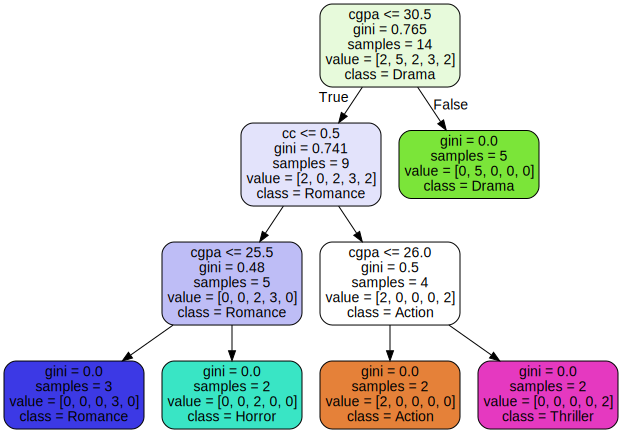

In [33]:
display(graphviz.Source(dot_graph))

In [36]:
import seaborn as sns

In [37]:
tips=sns.load_dataset('tips')

In [49]:
df=tips
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


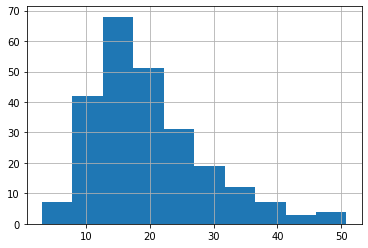

In [50]:
tips['total_bill'].hist()

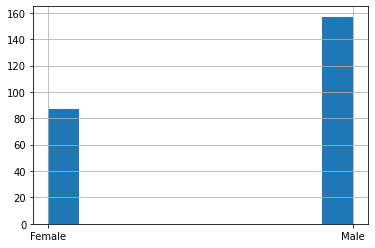

In [51]:
tips['sex'].hist()

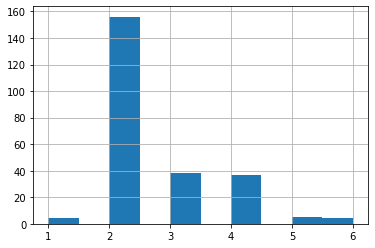

In [52]:
tips['size'].hist()

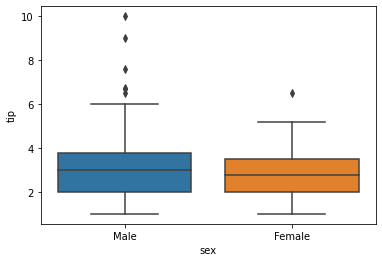

In [53]:
sns.boxplot(x='sex',y='tip',data=tips)

In [54]:
cor_mat=tips.corr()

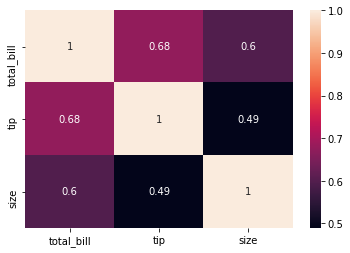

In [55]:
sns.heatmap(cor_mat,annot=True)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
X=df[['total_bill']]
Y=df['tip']

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=1)

In [69]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((195, 1), (49, 1), (195,), (49,))

In [70]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
model.score(X_train,Y_train)

0.4131943271267675

In [72]:
preds=model.predict(X_test)

In [73]:
mean_absolute_error(Y_test,preds)

0.7679498807002736

In [74]:
mean_squared_error(Y_test,preds)

1.229861539630728

In [75]:
r2_score(Y_test,preds)

0.53268096783414